## 6.4 Regression Analysis

### This script contains following steps:

#### 1. Importing libraries and data
#### 2. Subsetting Dataframe
#### 3. Data cleaning
#### 4. Data prep for regression analysis
#### 5. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

### Questions in Indicator Name as survey questions:

df_1: Indicator Name: Intentional homicides, female (per 100,000 female)
- Indicator Code: VC.IHR.PSRC.FE.P5
  
df_2: Indicator Name: There is legislation specifically addressing domestic violence (1=yes; 0=no)
- Indicator Code: SG.LEG.DVAW
            
df_3: Indicator Name: There is legislation on sexual harassment in employment (1=yes; 0=no)
- Indicator Code: SG.LEG.SXHR.EM

### Hypothsis: Homicide rate in EU has decreased in the last decade.

In [3]:
# Creating path
path =r'/Users/parvinrahimi/Desktop/Data/Data Immersion/Achievement 6/Violence'

In [4]:
# Importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data','Clean Data','EU_Data.pkl'))

### 2. Subsetting dataframe

In [5]:
# Creating subsets for data on intentional homicide
df_1= df.loc[df['Indicator Code'] == 'VC.IHR.PSRC.FE.P5']

### 3. Data cleaning

In [6]:
df_1.head(5)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,EU Region
10748,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2021,0,Southern Europe
10749,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2020,0,Southern Europe
10750,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2019,0,Southern Europe
10751,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2018,1,Southern Europe
10752,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2017,0,Southern Europe


In [7]:
# Rename the column Value in df_1
df_1.rename(columns = {'Value' : 'Value Homicide'}, inplace = True)

/var/folders/2m/x4ncpd5d6zn4gz7_m6f16nww0000gn/T/ipykernel_3442/3266789065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.rename(columns = {'Value' : 'Value Homicide'}, inplace = True)


In [8]:
df_1.head(5)

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value Homicide,EU Region
10748,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2021,0,Southern Europe
10749,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2020,0,Southern Europe
10750,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2019,0,Southern Europe
10751,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2018,1,Southern Europe
10752,"Intentional homicides, female (per 100,000 fem...",VC.IHR.PSRC.FE.P5,Albania,ALB,2017,0,Southern Europe


In [9]:
# dropping unnecessary columns in df_1
df_1 = df_1.drop(columns=['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code'])

In [10]:
df_1.head(5)

,Year,Value Homicide,EU Region
10748,2021,0,Southern Europe
10749,2020,0,Southern Europe
10750,2019,0,Southern Europe
10751,2018,1,Southern Europe
10752,2017,0,Southern Europe


In [11]:
df_1.shape

(753, 3)

In [12]:
# Check for missing values

df_1.isnull().sum()

# No missing values

Year              0
Value Homicide    0
EU Region         0
dtype: int64

In [13]:
# checking for duplicates
dups = df_1.duplicated()

In [14]:
dups.shape 
# No dups

(753,)

In [15]:
# mean of column Value Homicide
df_1['Value Homicide'].mean() 

0.7808764940239044

In [16]:
# datatypes of dataframe
df_1.dtypes

Year              object
Value Homicide     int64
EU Region         object
dtype: object

In [17]:
# changing the type of column year to int64 
df_1['Year'] = df_1['Year'].astype('int')

In [18]:
# datatypes of dataframe
df_1.dtypes

Year               int64
Value Homicide     int64
EU Region         object
dtype: object

### 4. Data preparation for regression analysis 

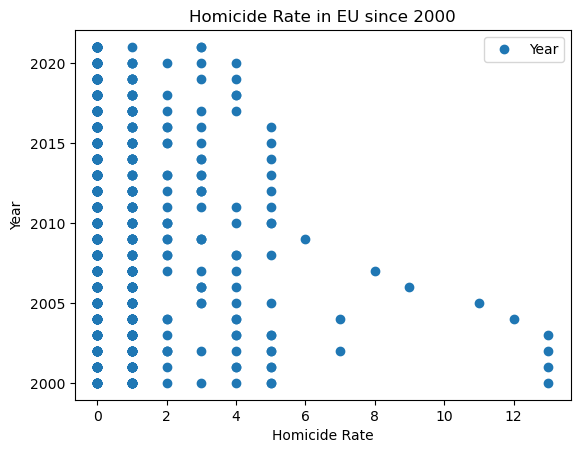

In [19]:
# Creating a scatterplot using matplotlib 
df_1.plot(x ='Value Homicide', y='Year',style='o')
plt.title('Homicide Rate in EU since 2000')  
plt.xlabel('Homicide Rate')  
plt.ylabel('Year')  
plt.show()

### Homicide rate >= 6 seem to be outliers. However since these are still importnat to the analysis, we keep them.

In [20]:
# Reshaping the variables into NumPy arrays and put them into separate objects
X = df_1['Value Homicide'].values.reshape(-1,1)
y = df_1['Year'].values.reshape(-1,1)

In [21]:
X

array([[ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 1],
       [ 2],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],

In [22]:
y

array([[2021],
       [2020],
       [2019],
       [2018],
       [2017],
       [2016],
       [2015],
       [2014],
       [2013],
       [2012],
       [2011],
       [2010],
       [2009],
       [2008],
       [2007],
       [2006],
       [2005],
       [2004],
       [2003],
       [2002],
       [2001],
       [2000],
       [2021],
       [2020],
       [2019],
       [2018],
       [2017],
       [2016],
       [2015],
       [2014],
       [2013],
       [2012],
       [2011],
       [2010],
       [2009],
       [2008],
       [2007],
       [2006],
       [2005],
       [2004],
       [2003],
       [2002],
       [2001],
       [2000],
       [2021],
       [2019],
       [2018],
       [2017],
       [2016],
       [2015],
       [2014],
       [2013],
       [2012],
       [2011],
       [2010],
       [2009],
       [2008],
       [2007],
       [2006],
       [2005],
       [2004],
       [2003],
       [2002],
       [2001],
       [2000],
       [2021],
       [20

In [23]:
# Splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [24]:
# Creating a regression object
regression = LinearRegression()  

In [25]:
# Fitting the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

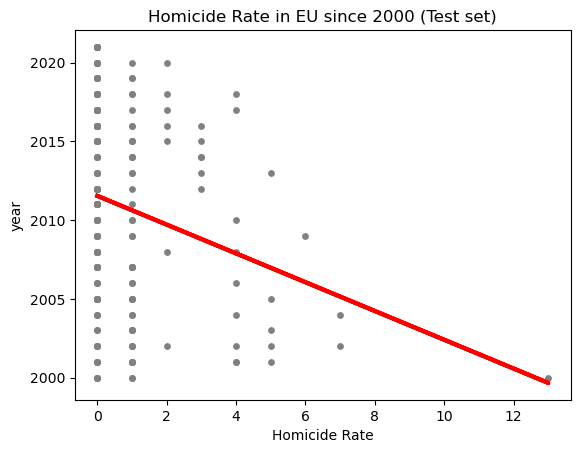

In [27]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Homicide Rate in EU since 2000 (Test set)')
plot_test.xlabel('Homicide Rate')
plot_test.ylabel('year')
plot_test.show()

### The red regression line does not cover all the values. Most of the values are far from the line. This indicates that the regression line does not fit the data perfectly.

In [28]:
# Creating objects that contain the model summary statistics
Model_Sum_Test = mean_squared_error(y_test, y_predicted)
r2_Test = r2_score(y_test, y_predicted)

In [29]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', Model_Sum_Test)
print('R2 score: ', r2_Test)

Slope: [[-0.91385458]]
Mean squared error:  35.48673969852247
R2 score:  0.05294476375004842


### A negative slope value (coefficient) close to one  indicates a negative relationship between the variables. That means that as the years pass by the homicide rate decreases. That is as y rises (recent years), X decreases. This actually confirms our hypothesis.

### however the mean squared error is very high considering how small the homicide rate values  are (0-13; mostly under 6). This indicates that the regression line isn’t an accurate representation of the data. 

### r-squared value is very close to 0, also meaning that the regression line is a poor fit.

In [30]:
y_predicted

array([[2011.54159762],
       [2011.54159762],
       [2009.71388845],
       [2010.62774303],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2008.80003386],
       [2010.62774303],
       [2011.54159762],
       [2010.62774303],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2005.14461553],
       [2008.80003386],
       [2011.54159762],
       [2010.62774303],
       [2011.54159762],
       [2010.62774303],
       [2007.88617928],
       [2010.62774303],
       [2010.62774303],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2011.54159762],
       [2007.88617928],
       [2010.62774303],
       [2011.54159762],
       [2011.54159762],
       [2010.62774303],
       [2009.71388845],
       [2007.886

In [31]:
# Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2016,2011.541598
1,2014,2011.541598
2,2017,2009.713888
3,2001,2010.627743
4,2021,2011.541598
5,2003,2011.541598
6,2011,2011.541598
7,2016,2011.541598
8,2004,2011.541598
9,2019,2011.541598


### The difference between the actual and predicted y values are quite high. This confirms that this model can not determine the relationship between the “year” and “the homicide rate” quite accurately.

In [32]:
# Comparing how the regression fits the training set: Predicting
y_predicted_train = regression.predict(X_train)

In [33]:
Model_Sum_Train = mean_squared_error(y_train, y_predicted_train)
r2_Train = r2_score(y_train, y_predicted_train)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', Model_Sum_Train)
print('R2 score: ', r2_Train)

Slope: [[-0.91385458]]
Mean squared error:  36.46394317434081
R2 score:  0.06040704547426978


### Both Train set and Test set show similar results. This means the model is not overfitted! However, it also confirms that the relationship we are examining may not be purely linear. Especially since most data points of homicide rate have stayed between 0 and 1 since 2000 in EU.

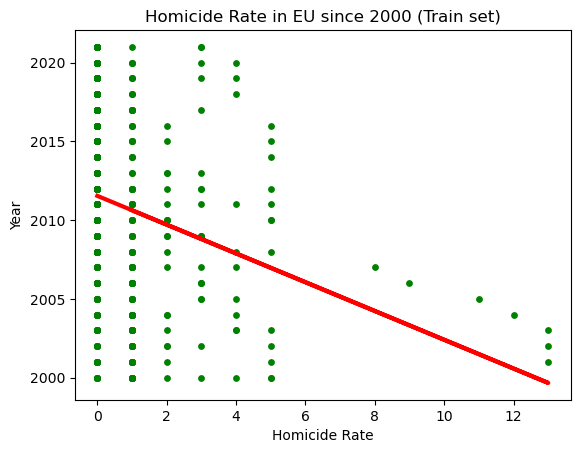

In [35]:
# Visualizing the training set results
plot_train = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Homicide Rate in EU since 2000 (Train set)')
plot_test.xlabel('Homicide Rate')
plot_test.ylabel('Year')
plot_test.show()

### Conclusion: Our hypothsis (Homicide rates in EU have decreased in the last decade) could be confirmed according to the scatterplot to some extent. However, this does not mean that linear regression demonstrates the data points accurately. Another important fact to mention ist the small size of the data. With only 753 rows, this may not be a perfect representation of the homicide rate in EU. 